### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Bussiness Goal

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Importing all the required libraries

In [508]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

#### Data Understanding

In [509]:
# Load data from csv
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [510]:
# shape of dataframe
house_data.shape

(1460, 81)

In [511]:
#descitption
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [512]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Handling Missing Value

In [513]:
def null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

In [514]:
# Missing values of all columns

Na_col = null_percentage(house_data)
Na_col[Na_col > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### Dropping columns where null values are more than 17 %.

In [515]:
house_data_updated = house_data.drop(columns=['Id','PoolQC','Fence', 'MiscFeature','LotFrontage','Alley'])

In [516]:
house_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

#### Dealing with missing values.

~   To analyze further we are dividning our columns into object and numerical column.

~   To deal with missing values we are replacing the column with most common values of that column.

In [517]:
def filter_columns_by_type(dataframe):
    """
    Filters out object (categorical) and numerical columns from a pandas DataFrame.

    Parameters:
    - dataframe: pandas DataFrame

    Returns:
    - tuple containing DataFrames: one with object columns and one with numerical columns
    """

    # Select object (categorical) columns
    object_columns = dataframe.select_dtypes(include='object')

    # Select numerical columns
    numerical_columns = dataframe.select_dtypes(exclude='object')

    return object_columns, numerical_columns

# Example Usage:
# Assuming 'your_dataframe' is your actual DataFrame
# Replace 'your_dataframe' with the actual variable name of your DataFrame
object_cols, numerical_cols = filter_columns_by_type(house_data_updated)

# Print or use the resulting DataFrames as needed
print("Object Columns:")
print(object_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Object Columns:
     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ         NaN     Attchd          RFn         TA         TA          Y       WD        Normal
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable

In [518]:
import pandas as pd

def replace_missing_with_most_common(dataframe):
    # Replace missing values with the most common value in each column
    dataframe_filled = dataframe.apply(lambda col: col.fillna(col.mode().iloc[0]))

    return dataframe_filled

# Example Usage:
# Assuming 'your_dataframe' is your actual DataFrame
# Replace 'your_dataframe' with the actual variable name of your DataFrame
object_cols_filled = replace_missing_with_most_common(object_cols)
numerical_cols_filled = replace_missing_with_most_common(numerical_cols)



In [519]:
numerical_cols_filled.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [520]:
object_cols_filled.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [521]:
final_data = pd.concat([object_cols_filled,numerical_cols_filled],axis=1)

In [522]:
final_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [523]:
# Missing values of all columns

Na_col = null_percentage(final_data)
Na_col

MSZoning       0.0
Street         0.0
LotShape       0.0
LandContour    0.0
Utilities      0.0
              ... 
PoolArea       0.0
MiscVal        0.0
MoSold         0.0
YrSold         0.0
SalePrice      0.0
Length: 75, dtype: float64

In [524]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
final_data['HouseAge'] = final_data.YrSold - final_data.YearBuilt

In [525]:
#Drop YrSold, YearBuilt after HouseAge
final_data=final_data.drop(columns=['YrSold', 'YearBuilt'])

In [526]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
final_data = final_data.astype(convert_dict)

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [527]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
final_data = final_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [528]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
final_data = final_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [529]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
final_data = final_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [530]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
final_data = final_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [531]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
final_data = final_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [532]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
final_data = final_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [533]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
final_data = final_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [534]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
final_data = final_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [535]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   Street         1460 non-null   object 
 2   LotShape       1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  RoofStyle      1460 non-null   object 
 13  RoofMatl       1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  ExterQual      1460 non-null   int64  
 18  ExterCon

In [536]:
for c in final_data.columns:
    if final_data[c].dtype == object :
        print(c)
        print(final_data[c].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.

In [537]:
## We can drop street highly bias column
final_data["Street"].value_counts(normalize=True)

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

In [538]:
## We can drop LandContour highly bias column
final_data["LandContour"].value_counts(normalize=True)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

In [539]:
## We can drop Utilities highly bias column
final_data["Utilities"].value_counts(normalize=True)

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

In [540]:
## We can drop LandSlope highly bias column
final_data["LandSlope"].value_counts(normalize=True)

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

In [541]:
## We can drop Condition2 highly bias column
final_data["Condition2"].value_counts(normalize=True)

Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: Condition2, dtype: float64

In [542]:
## We can drop RoofMatl highly bias column
final_data["RoofMatl"].value_counts(normalize=True)

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: RoofMatl, dtype: float64

In [543]:
## We can drop BsmtCond highly bias column
final_data["BsmtCond"].value_counts(normalize=True)

TA    0.923288
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

In [544]:
## We can drop Heating highly bias column
final_data["Heating"].value_counts(normalize=True)

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

In [545]:
## We can drop CentralAir highly bias column
final_data["CentralAir"].value_counts(normalize=True)

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

In [546]:
## We can drop Electrical highly bias column
final_data["Electrical"].value_counts(normalize=True)

SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

In [547]:
## We can drop Functional highly bias column
final_data["Functional"].value_counts(normalize=True)

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

In [548]:
## We can drop GarageQual highly bias column
final_data["GarageQual"].value_counts(normalize=True)

TA    0.953425
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

In [549]:
## We can drop GarageCond highly bias column
final_data["GarageCond"].value_counts(normalize=True)

TA    0.963699
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

In [550]:
## We can drop Heating highly bias column
final_data["PavedDrive"].value_counts(normalize=True)

Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

In [551]:
## We can drop Condition1 highly bias column
final_data["Condition1"].value_counts(normalize=True)

Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: Condition1, dtype: float64

In [552]:
## We can drop BldgType highly bias column
final_data["BldgType"].value_counts(normalize=True)

1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64

In [553]:
## We can drop ExterCond highly bias column
final_data["ExterCond"].value_counts(normalize=True)

TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64

In [554]:
## We can drop BsmtFinType2 highly bias column
final_data["BsmtFinType2"].value_counts(normalize=True)

Unf    0.886301
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

In [555]:
## We can drop Heating highly bias column
final_data["SaleType"].value_counts(normalize=True)

WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: SaleType, dtype: float64

In [556]:
## We can drop Heating highly bias column
final_data["SaleCondition"].value_counts(normalize=True)

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

In [557]:
#Drop columns which have moe than 80% bias data
final_data=final_data.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [558]:
#Get all object type columns
object_columns = []
for c in final_data.columns:
    if final_data[c].dtype == object:
        object_columns.append(c)
print(object_columns)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish', 'MSSubClass']


### Create Dummy Varibales

In [559]:
# create dummy variable for MSZoning
MSZoning_df = pd.get_dummies(final_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [560]:
# create dummy variable for LotShape
LotShape_df = pd.get_dummies(final_data['LotShape'],drop_first=True, prefix='LotShape')
LotShape_df.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [561]:
# create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(final_data['LotConfig'],drop_first=True, prefix='LotConfig')
LotConfig_df.head()

,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0


In [562]:
# create dummy variable for Neighborhood
Neighborhood_df = pd.get_dummies(final_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
Neighborhood_df.head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [563]:
# create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(final_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
HouseStyle_df.head()

,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [564]:
# create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(final_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
HouseStyle_df.head()

,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [565]:
# create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(final_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
RoofStyle_df.head()

,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [566]:
# create dummy variable for RoofStyle
Exterior1st_df = pd.get_dummies(final_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
Exterior1st_df.head()

,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [567]:
# create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(final_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
Exterior2nd_df.head()

,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [568]:
# create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(final_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
MasVnrType_df.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [569]:
# create dummy variable for RoofStyle
GarageType_df = pd.get_dummies(final_data['GarageType'],drop_first=True, prefix='GarageType')
GarageType_df.head()

,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [570]:
# create dummy variable for GarageFinish_df
GarageFinish_df = pd.get_dummies(final_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
GarageFinish_df.head()

,GarageFinish_RFn,GarageFinish_Unf
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [571]:
# create dummy variable for GarageFinish_df
MSSubClass_df = pd.get_dummies(final_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
MSSubClass_df.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [572]:
# create dummy variable for MasVnrType
Foundation_df = pd.get_dummies(final_data['Foundation'],drop_first=True, prefix='Foundation')
Foundation_df.head()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0


In [573]:
# create dummy variable for ExterQual
ExterQual_df = pd.get_dummies(final_data['ExterQual'],drop_first=True, prefix='ExterQual')
ExterQual_df.head()

,ExterQual_3,ExterQual_4,ExterQual_5
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [574]:
#concat dummy variables with main finaldata
final_data = pd.concat([final_data,MSZoning_df,LotShape_df, LotConfig_df, Neighborhood_df, HouseStyle_df,RoofStyle_df,Exterior1st_df,Exterior2nd_df,MasVnrType_df, Foundation_df,GarageType_df,GarageFinish_df, MSSubClass_df,ExterQual_df],axis=1)
final_data.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,ExterQual_3,ExterQual_4,ExterQual_5
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,4,PConc,4,1,6,5,4,4,Attchd,RFn,60,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,3,CBlock,4,4,5,5,3,3,Attchd,RFn,20,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,4,PConc,4,2,6,5,4,3,Attchd,RFn,60,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,3,BrkTil,3,1,5,4,4,4,Detchd,Unf,70,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [575]:
final_data.shape

(1460, 162)

In [576]:
final_data=final_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish','ExterQual'])

In [577]:
final_data.shape

(1460, 148)

### Prepairing Data For Modeling

In [578]:
train,test = train_test_split(final_data,train_size=0.70,random_state=101)
print(train.shape)
print(test.shape)

(1021, 148)
(439, 148)


In [579]:
train.describe()

,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,ExterQual_3,ExterQual_4,ExterQual_5
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0000

### Training The Model

In [580]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = train.pop('SalePrice')
X_train = train

In [581]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
numerical_columns = X_train.select_dtypes(exclude='object')
#fit on data
X_train[numerical_columns.columns] = scaler.fit_transform(X_train[numerical_columns.columns])
X_train.head()

,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,ExterQual_3,ExterQual_4,ExterQual_5
1408,-2.322625,-0.637862,-1.267043,-0.170030,-0.794786,0.476531,-0.350455,-1.538564,1.295042,-1.720785,-0.571817,-1.017809,-0.301187,0.120891,-1.062226,-1.129388,0.653364,-0.116713,-0.283949,-0.823278,-0.254397,-1.025497,-0.758108,0.166810,-0.197547,-0.310119,-0.969123,-0.588898,0.314716,0.261249,-0.773941,-0.723103,-0.355734,-0.110214,2.829557,-0.069886,-0.091346,-0.120625,2.162072,-0.217208,-0.094304,-2.001225,2.477874,-0.158431,-0.088867,0.753894,-0.279538,-0.170979,-0.054286,0.616222,-0.031311,-0.109055,-0.199286,-0.151809,-0.345713,-0.188406,-0.275444,-0.243164,-0.137703,-0.109055,-0.182759,-0.418227,-0.076885,-0.236311,-0.170979,-0.243164,3.526218,-0.126176,-0.238612,-0.193911,-0.256441,-0.130124,-0.16165,-0.099454,-0.099454,-1.016791,-0.062715,-0.094304,1.535758,-0.158431,-0.222108,0.540745,-0.083086,-0.505809,-0.070152,-0.044302,-0.031311,-0.044302,-0.176955,-0.031311,-0.212216,-0.429482,-0.031311,-0.413366,-0.27338,0.0,-0.122109,1.329262,-0.401929,-0.148398,-0.054286,-0.070152,-0.122109,-0.031311,-0.212216,-0.410112,-0.088867,-0.403572,-0.031311,-0.325846,-0.054286,-0.126176,1.357944,-0.383655,-0.179878,-0.667964,0.829218,-0.310918,1.124214,-0.896597,-0.10436,-0.054286,-0.044302,-1.387624,-0.109055,-0.262888,-0.076885,1.702042,-0.640485,1.082747,-0.222108,-0.062715,-0.088867,-0.324004,-0.507335,5.156995,-0.10436,-0.207125,-0.126176,-0.176955,-0.245415,-0.214724,-0.076885,-0.137703,0.797633,-0.719088,-0.193911
1165,0.647193,-0.637862,-1.267043,0.882097,0.710737,0.476531,-0.105344,0.647253,-0.502698,1.165188,0.884080,-1.017809,-0.301187,2.103545,1.030209,0.896429,-0.777546,-0.116713,-0.013371,-0.823278,-0.254397,0.7

In [582]:
X_train.shape

(1021, 147)

### RFE- Recursive Feature Elimination

___Take Top 20 Features from `RFE`___

In [583]:
#Running RFE with the out variables equals to 20
lr = LinearRegression()
lr.fit(X_train, y_train)

#Cut down number of features to 20 using automated approach
rfe = RFE(lr,  n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [584]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 60),
 ('HeatingQC', False, 75),
 ('KitchenQual', True, 1),
 ('FireplaceQu', False, 89),
 ('LotArea', False, 12),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 128),
 ('MasVnrArea', False, 8),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 26),
 ('BsmtUnfSF', False, 16),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 25),
 ('GrLivArea', False, 17),
 ('BsmtFullBath', False, 124),
 ('BsmtHalfBath', False, 72),
 ('FullBath', False, 78),
 ('HalfBath', False, 44),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 5),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 21),
 ('GarageYrBlt', False, 22),
 ('GarageCars', True, 1),
 ('GarageArea', False, 73),
 ('WoodDeckSF', False, 90),
 ('OpenPorchSF', False, 106),
 ('EnclosedPorch', False, 103),
 ('3SsnPorch', False, 70),
 ('ScreenPorch', False, 111),
 ('PoolArea', False, 9),
 ('

In [585]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['BsmtQual', 'BsmtExposure', 'KitchenQual', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'HouseAge', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MSSubClass_120', 'ExterQual_5'], dtype='object')

### Building model using statsmodel,

In [586]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [587]:
#Get the Summary of Linear Model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     332.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:15:59   Log-Likelihood:                -11929.
No. Observations:                1021   AIC:                         2.390e+04
Df Residuals:                    1000   BIC:                         2.400e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.815e+05 

In [588]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
18,Exterior2nd_VinylSd,20.54
17,Exterior1st_VinylSd,20.47
9,2ndFlrSF,4.45
8,1stFlrSF,4.17
7,TotalBsmtSF,4.11
4,OverallQual,3.49
16,HouseStyle_1Story,3.42
12,HouseAge,3.22
1,BsmtQual,2.96
3,KitchenQual,2.21


Exterior2nd_VinylSd has high VIF

In [589]:
X_train_new1 = X_train_rfe.drop(['Exterior2nd_VinylSd'],axis=1)
#ceatinf X_train with RFE selected columns
X_train_new1.columns 

Index(['const', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'HouseAge', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'Exterior1st_VinylSd', 'MSSubClass_120', 'ExterQual_5'], dtype='object')

In [590]:
#X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm2 = sm.OLS(y_train,X_train_new1).fit()

In [591]:
#check the summary of model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     348.9
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:15:59   Log-Likelihood:                -11931.
No. Observations:                1021   AIC:                         2.390e+04
Df Residuals:                    1001   BIC:                         2.400e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.815e+05 

In [592]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,2ndFlrSF,4.44
8,1stFlrSF,4.17
7,TotalBsmtSF,4.11
4,OverallQual,3.48
16,HouseStyle_1Story,3.42
12,HouseAge,3.22
1,BsmtQual,2.96
3,KitchenQual,2.21
11,GarageCars,2.00
10,BedroomAbvGr,1.85


#### drop all the columns with high p values

In [593]:
p_values = lm2.pvalues

# Identify variables with p-values greater than 0.05
dropped_variables = p_values[p_values > 0.05].index

In [594]:
dropped_variables

Index(['Exterior1st_VinylSd'], dtype='object')

In [595]:
X_train_new2 = X_train_new1.drop(dropped_variables,axis=1)
#ceatinf X_train with RFE selected columns
X_train_new2.columns 

Index(['const', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'HouseAge', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'MSSubClass_120', 'ExterQual_5'], dtype='object')

In [596]:
X_train_final = X_train_new2
#Running the Linear Model
lm = sm.OLS(y_train,X_train_final).fit()

In [597]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     368.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:15:59   Log-Likelihood:                -11931.
No. Observations:                1021   AIC:                         2.390e+04
Df Residuals:                    1002   BIC:                         2.399e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.815e+05 

We can cosider the above model. as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 368 (which is greater than 1) states that the overall model is significant

### Residual analysis of Train Data

In [598]:
y_train_cnst = lm.predict(X_train_final)

Text(0.5, 0, 'Errors')

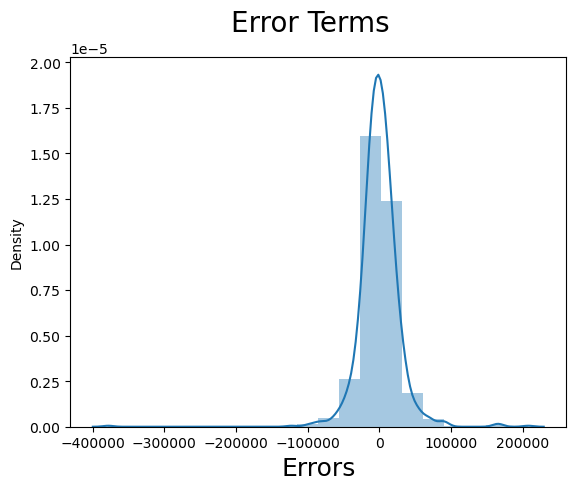

In [599]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

This graph shows that error terms are following normal distribution

In [600]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
calculateVIF(X_train_final)

,Features,VIF
9,2ndFlrSF,4.39
8,1stFlrSF,4.12
7,TotalBsmtSF,4.08
4,OverallQual,3.48
16,HouseStyle_1Story,3.38
12,HouseAge,3.02
1,BsmtQual,2.93
3,KitchenQual,2.18
11,GarageCars,2.00
10,BedroomAbvGr,1.85


This tables shows that no multicollinarlity

In [601]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.87

In [602]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

844408228391.9
827040380.4034281
28758.309762630837


In [603]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

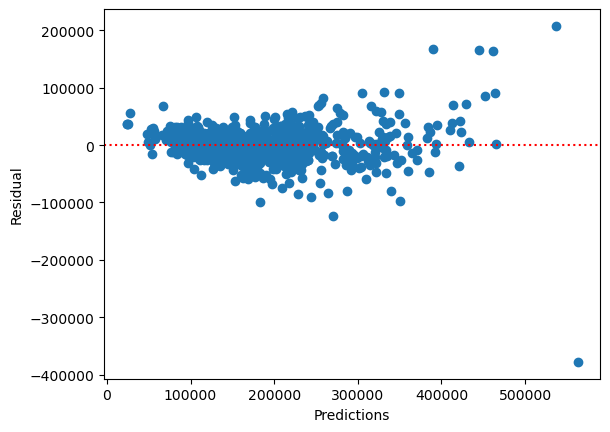

In [604]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [605]:
#instantiate the object
scaler = StandardScaler()



#fit on data
test[numerical_columns.columns] = scaler.fit_transform(test[numerical_columns.columns])
test.head()

,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,ExterQual_3,ExterQual_4,ExterQual_5
1054,0.629118,0.357515,1.223269,0.912947,0.796808,0.459293,0.026585,1.373058,-0.551382,0.847970,0.648961,1.027572,-0.258412,-0.988493,0.071020,-0.159623,1.205875,-0.128259,0.831577,1.125743,-0.20786,0.821389,1.206522,0.156717,-0.241238,0.267928,0.632995,0.908157,0.304782,0.516611,0.839073,0.116290,-0.369945,-0.131308,-0.250620,-0.066176,-0.141853,1.805402,255000,-1.094626,-0.212692,-0.127294,0.560688,-0.453921,-0.194487,-0.067651,0.776009,-0.218478,-0.206774,-0.047782,-1.567384,-0.047782,-0.095893,-0.212692,-0.107335,3.115657,-0.194487,-0.261011,-0.229691,-0.206774,-0.107335,-0.194487,-0.446602,-0.08295,-0.212692,-0.16764,-0.218478,-0.303381,-0.144673,-0.212692,-0.229691,-0.235135,-0.136241,-0.16764,-0.047782,-0.095893,-0.944585,-0.095893,-0.067651,1.453780,-0.16764,-0.20071,0.500712,-0.095893,-0.464830,-0.067651,0.0,0.0,0.0,-0.212692,0.0,-0.200710,-0.409333,0.0,-0.439243,-0.303381,-0.067651,-0.152676,1.416633,-0.413118,-0.095893,0.0,-0.067651,-0.152676,0.0,-0.194487,-0.397884,-0.067651,-0.439243,0.0,-0.333755,-0.067651,-0.152676,1.423933,-0.420647,-0.117715,1.541727,-1.245924,-0.307836,-0.845484,1.134221,-0.17469,-0.08295,-0.047782,0.757282,-0.127294,-0.229691,-0.08295,-0.630943,-0.630943,-0.984180,-0.224141,0.0,-0.095893,-0.346263,1.969207,-0.235135,-0.107335,-0.194487,-0.095893,-0.224141,-0.265954,-0.206774,-0.095893,-0.160315,-1.340216,1.461408,-0.188089
361,-0.824476,-0.617324,-0.222912,-0.109461,-0.717472,0.459293,-0.128591,-0.761910,-0.551382,-0.101428,-0.569303,-0.064849,-0.258412,-0.184741,-0.310730,-0.410586,0.339126,-0.128259,-0.046827,1.125743,-0.20786,-1.027790,-0.769833,0.156717,-0.241238,0.874219,-

In [606]:
#create y_test and X_test
y_test = test.pop('SalePrice')
X_test = test

In [607]:
#trained model columns
len(X_train_final.columns)

19

In [608]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     368.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:16:41   Log-Likelihood:                -11931.
No. Observations:                1021   AIC:                         2.390e+04
Df Residuals:                    1002   BIC:                         2.399e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.815e+05 

In [609]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test

# Adding a constant variable 
X_test = sm.add_constant(X_test)
X_test_final = X_test[X_train_final.columns]


In [610]:
y_pred = lm.predict(X_test_final)

In [611]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.77

In [612]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

636311699258.3232
1449457173.7091646
38071.737203720615


Text(0, 0.5, 'y_pred')

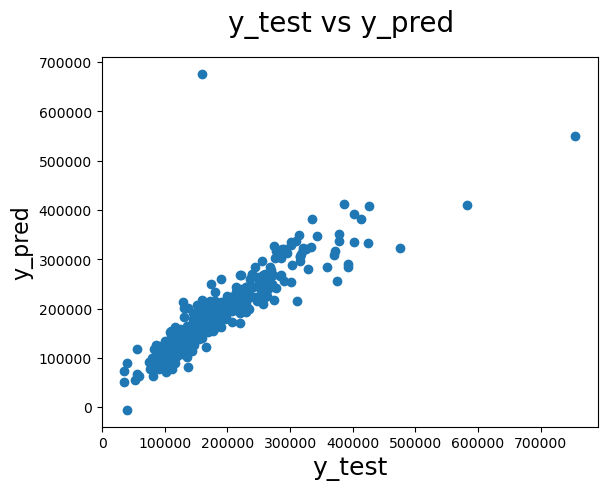

In [613]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [614]:
X_train_new2.columns

Index(['const', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'HouseAge', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'MSSubClass_120', 'ExterQual_5'], dtype='object')

### Final evalution
- No of Variables = `19` i.e. 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'HouseAge', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'MSSubClass_120', 'ExterQual_5'
- p-value < `0.05`
- r2 score for Train Data set model = `0.88`
- r2 score for Test Data set model = `0.77`

In [615]:
X_train_final_columns = X_train_final.drop(['const'],axis =1)

In [616]:
X_train_final_columns.columns

Index(['BsmtQual', 'BsmtExposure', 'KitchenQual', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'HouseAge', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_1Story', 'MSSubClass_120', 'ExterQual_5'], dtype='object')

In [617]:
from sklearn.linear_model import RidgeCV

### Ridge Regression

In [618]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [619]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [620]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised

ridge = Ridge(alpha=20)

ridge.fit(X_train_final, y_train)
print(ridge.coef_)

[    0.          6371.83913869  5764.54067542  6807.09145292
 15429.97234186  6012.91943746  7473.80006232  7563.00263014
 20350.61129578 26982.11998675 -3946.68706822  6609.61180707
 -6577.34735373  7266.25244278  8406.15125587  6043.79715392
  5724.56161448 -6290.58762439  6183.71714059]


In [621]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_final)
y_pred_test = ridge.predict(X_test_final)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8684452423813371
0.7706090649194104
846624932929.0044
635705936919.6538
829211491.6052933
1448077305.056159


### Lassoo Regression

In [622]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [623]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [624]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final, y_train) 

Lasso(alpha=100)

In [625]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_final)
y_pred_test = lasso.predict(X_test_final)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8687498735621915
0.7704269443775389
844664469029.9607
636210643479.4929
827291350.6659752
1449226978.3131957


## Lets observe the changes in the coefficients after regularization

In [626]:
betas = pd.DataFrame(index=X_train_final.columns)

In [627]:
betas.rows = X_train_final.columns

In [628]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [629]:
betas

,Linear,Ridge,Lasso
const,181490.678746,0.000000,0.000000
BsmtQual,6048.929329,6371.839139,6090.656500
BsmtExposure,6013.030653,5764.540675,5891.361456
KitchenQual,6380.397238,6807.091453,6470.713965
OverallQual,15357.591484,15429.972342,15495.808512
OverallCond,6350.198437,6012.919437,6156.046656
BsmtFinSF1,7479.054201,7473.800062,7489.788128
TotalBsmtSF,6897.513589,7563.002630,6934.466842
1stFlrSF,21838.700414,20350.611296,21647.988784
2ndFlrSF,29667.397763,26982.119987,28900.050947


### Que1: Double the values of Alpha for lasso & Ridge

In [630]:
#earlier for Ridge alpha = 20 now take 40
alpha = 40
ridge = Ridge(alpha=40)

ridge.fit(X_train_final, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_final)
y_pred_test = ridge.predict(X_test_final)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[    0.          6616.97167417  5575.49425132  7145.54143415
 15432.77949524  5728.84574245  7461.50060352  8044.50230687
 19193.17456024 24876.43044843 -3089.63423411  6919.44772793
 -6230.02914258  7405.65865683  8210.7792236   6001.24194318
  4547.86105888 -5972.80426264  6296.7669283 ]
0.8676771858999422
0.7703310119580126


In [631]:
# Get the coefficients of the Lasso model
coefficients = ridge.coef_

# Get the absolute values of the coefficients and sort them
abs_coefficients = abs(coefficients)
sorted_indices = abs_coefficients.argsort()[::-1] 

In [632]:
top_5_features_indices = sorted_indices[:5]

In [633]:
X_train_final.columns[top_5_features_indices]

Index(['2ndFlrSF', '1stFlrSF', 'OverallQual', 'Neighborhood_NridgHt', 'TotalBsmtSF'], dtype='object')

#### Coeff values are decreasing as alpha will increase. r2_score is also decreasing in bOoth test and train (very less change)_

In [646]:
#earlier for Lasso alpha = 100 now take 200
alpha =200
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_final)
y_pred_test = lasso.predict(X_test_final)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[    0.          6135.21698009  5770.3198469   6562.82656738
 15628.37606286  5963.11835464  7499.19335452  6969.54576837
 21460.25157343 28133.62540154 -4316.35924444  6284.89209214
 -6723.62199928  6995.76797042  8369.96318435  5862.4868949
  6152.54231902 -6179.71752233  6051.95598233]
0.8686305805012383
0.7703888389852999


In [635]:
# Get the coefficients of the Lasso model
coefficients = lasso.coef_

# Get the absolute values of the coefficients and sort them
abs_coefficients = abs(coefficients)
sorted_indices = abs_coefficients.argsort()[::-1] 

In [636]:
top_5_features_indices = sorted_indices[:5]

In [637]:
top_5_features = X_train_final.columns[top_5_features_indices]

In [638]:
top_5_features

Index(['2ndFlrSF', '1stFlrSF', 'OverallQual', 'Neighborhood_NridgHt', 'BsmtFinSF1'], dtype='object')

In [639]:
betas['Ridge_new'] = ridge.coef_
betas['Lasso_new'] = lasso.coef_

In [640]:
betas

,Linear,Ridge,Lasso,Ridge_new,Lasso_new
const,181490.678746,0.000000,0.000000,0.000000,0.000000
BsmtQual,6048.929329,6371.839139,6090.656500,6616.971674,6135.216980
BsmtExposure,6013.030653,5764.540675,5891.361456,5575.494251,5770.319847
KitchenQual,6380.397238,6807.091453,6470.713965,7145.541434,6562.826567
OverallQual,15357.591484,15429.972342,15495.808512,15432.779495,15628.376063
OverallCond,6350.198437,6012.919437,6156.046656,5728.845742,5963.118355
BsmtFinSF1,7479.054201,7473.800062,7489.788128,7461.500604,7499.193355
TotalBsmtSF,6897.513589,7563.002630,6934.466842,8044.502307,6969.545768
1stFlrSF,21838.700414,20350.611296,21647.988784,19193.174560,21460.251573
2ndFlrSF,29667.397763,26982.119987,28900.050947,24876.430448,28133.625402


In [641]:
X_train.head()

,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,ExterQual_3,ExterQual_4,ExterQual_5
1408,-2.322625,-0.637862,-1.267043,-0.170030,-0.794786,0.476531,-0.350455,-1.538564,1.295042,-1.720785,-0.571817,-1.017809,-0.301187,0.120891,-1.062226,-1.129388,0.653364,-0.116713,-0.283949,-0.823278,-0.254397,-1.025497,-0.758108,0.166810,-0.197547,-0.310119,-0.969123,-0.588898,0.314716,0.261249,-0.773941,-0.723103,-0.355734,-0.110214,2.829557,-0.069886,-0.091346,-0.120625,2.162072,-0.217208,-0.094304,-2.001225,2.477874,-0.158431,-0.088867,0.753894,-0.279538,-0.170979,-0.054286,0.616222,-0.031311,-0.109055,-0.199286,-0.151809,-0.345713,-0.188406,-0.275444,-0.243164,-0.137703,-0.109055,-0.182759,-0.418227,-0.076885,-0.236311,-0.170979,-0.243164,3.526218,-0.126176,-0.238612,-0.193911,-0.256441,-0.130124,-0.16165,-0.099454,-0.099454,-1.016791,-0.062715,-0.094304,1.535758,-0.158431,-0.222108,0.540745,-0.083086,-0.505809,-0.070152,-0.044302,-0.031311,-0.044302,-0.176955,-0.031311,-0.212216,-0.429482,-0.031311,-0.413366,-0.27338,0.0,-0.122109,1.329262,-0.401929,-0.148398,-0.054286,-0.070152,-0.122109,-0.031311,-0.212216,-0.410112,-0.088867,-0.403572,-0.031311,-0.325846,-0.054286,-0.126176,1.357944,-0.383655,-0.179878,-0.667964,0.829218,-0.310918,1.124214,-0.896597,-0.10436,-0.054286,-0.044302,-1.387624,-0.109055,-0.262888,-0.076885,1.702042,-0.640485,1.082747,-0.222108,-0.062715,-0.088867,-0.324004,-0.507335,5.156995,-0.10436,-0.207125,-0.126176,-0.176955,-0.245415,-0.214724,-0.076885,-0.137703,0.797633,-0.719088,-0.193911
1165,0.647193,-0.637862,-1.267043,0.882097,0.710737,0.476531,-0.105344,0.647253,-0.502698,1.165188,0.884080,-1.017809,-0.301187,2.103545,1.030209,0.896429,-0.777546,-0.116713,-0.013371,-0.823278,-0.254397,0.7

Ques 3: Let us drop the top 5 varibales from x_train.

In [648]:
X_train_final_new = X_train_final.drop(top_5_features,axis = 1)

In [655]:
X_test_final_new = X_test_final.drop(top_5_features,axis = 1)

In [649]:
X_train_final_new.head()

,const,BsmtQual,BsmtExposure,KitchenQual,OverallCond,TotalBsmtSF,BedroomAbvGr,GarageCars,HouseAge,Neighborhood_NoRidge,Neighborhood_StoneBr,HouseStyle_1Story,MSSubClass_120,ExterQual_5
1408,1.0,-2.322625,-0.637862,-0.794786,1.295042,-1.062226,0.166810,0.314716,2.162072,-0.170979,-0.130124,-1.016791,-0.245415,-0.193911
1165,1.0,0.647193,-0.637862,0.710737,-0.502698,1.030209,0.166810,0.314716,-1.204368,-0.170979,-0.130124,0.983486,-0.245415,-0.193911
1346,1.0,-0.837716,-0.637862,-0.794786,1.295042,1.187141,0.166810,0.314716,0.074879,-0.170979,-0.130124,0.983486,-0.245415,-0.193911
399,1.0,0.647193,-0.637862,0.710737,-0.502698,0.055324,-1.058466,0.314716,-1.103374,-0.170979,-0.130124,-1.016791,-0.245415,-0.193911
6,1.0,2.132103,1.277600,0.710737,-0.502698,1.467718,0.166810,0.314716,-1.103374,-0.170979,-0.130124,0.983486,-0.245415,-0.193911


In [650]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [653]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [658]:
#earlier for Lasso alpha = 100 now take 200
alpha =200
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_final_new)
y_pred_test = lasso.predict(X_test_final_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[    0.         14283.76501703  4858.63118327 15889.40313749
  5388.33834023 25714.92938331  6429.89724108 14681.39293854
 -4088.92671135 11726.91643145  7187.55907291 -9939.00318739
 -2756.87268713 11350.16229744]
0.7857062604261587
0.6965768018477938


In [659]:
coefficients = lasso.coef_

# Get the absolute values of the coefficients and sort them
abs_coefficients = abs(coefficients)
sorted_indices = abs_coefficients.argsort()[::-1] 

In [660]:
top_5_features_indices = sorted_indices[:5]

In [661]:
top_5_features = X_train_final_new.columns[top_5_features_indices]

In [662]:
top_5_features

Index(['TotalBsmtSF', 'KitchenQual', 'GarageCars', 'BsmtQual', 'Neighborhood_NoRidge'], dtype='object')

Ques3 : 
Top 5 feature are '2ndFlrSF', '1stFlrSF', 'OverallQual', 'Neighborhood_NridgHt', 'TotalBsmtSF'
if we remove top 5 features then top 5 features are: 'TotalBsmtSF', 'KitchenQual', 'GarageCars', 'BsmtQual', 'Neighborhood_NoRidge'